# MODÉLISATION

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import model_selection
from sklearn import neighbors, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from pprint import pprint

In [136]:
def Calcul_Erreur(Y_test,y_pred):
    print("MAE : {:.4f}".format( np.mean(abs(y_pred-Y_test)) ))
    print("R-squared : {:.4f}".format (r2_score(Y_test,y_pred)))
    print("MSE : {:.4f}".format( metrics.mean_squared_error(Y_test, y_pred) ))
    print("RMSE : {:.4f}".format(np.sqrt( metrics.mean_squared_error(Y_test, y_pred) )))
    
def Return_Erreur(Y_test,y_pred):
    MAE =(np.mean(abs(y_pred-Y_test)) )
    #R_squared = (r2_score(Y_test,y_pred))
    MSE = (metrics.mean_squared_error(Y_test, y_pred) )
    RMSE = (np.sqrt( metrics.mean_squared_error(Y_test, y_pred) ))
    return ( MAE, MSE, RMSE)
#,R_squared


In [46]:
df = pd.read_csv('df_clean.csv')

In [95]:
df.dropna(axis=0, inplace=True)

In [96]:
df.head(2)

,PrimaryPropertyType,Latitude,NumberofFloors,ComplianceStatus,BuildingType,CouncilDistrictCode,OSEBuildingID,Neighborhood,PropertyGFAParking,TotalGHGEmissions,...,Nonresidential COS,Nonresidential WA,SPS-District K-12,CSC 2,CSC 3,CSC 4,CSC 5,CSC 6,CSC 7,Age
0,Low-Rise Multifamily,47.609736,1.252468,1,Multifamily LR (1-4),CSC 7,61,Downtown,0.0,112.06,...,0,0,0,0,0,0,0,0,1,116
1,Low-Rise Multifamily,47.544238,1.252468,1,Multifamily LR (1-4),CSC 1,266,Delridge,0.0,8.45,...,0,0,0,0,0,0,0,0,0,9


In [97]:
df.columns

Index(['PrimaryPropertyType', 'Latitude', 'NumberofFloors', 'ComplianceStatus',
       'BuildingType', 'CouncilDistrictCode', 'OSEBuildingID', 'Neighborhood',
       'PropertyGFAParking', 'TotalGHGEmissions', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'NumberofBuildings',
       'Longitude', 'RecentUpgrade', 'Central', 'Delridge', 'Downtown', 'East',
       'Greater duwamish', 'Lake union', 'Magnolia / queen anne', 'North',
       'Northeast', 'Northwest', 'Southeast', 'Southwest',
       'High-Rise Multifamily', 'Hospital', 'Hotel', 'K-12 School',
       'Laboratory', 'Low-Rise Multifamily', 'Medical Office',
       'Mid-Rise Multifamily', 'Mixed Use Property', 'Office', 'Other',
       'Refrigerated Warehouse', 'Residence Hall', 'Restaurant',
       'Retail Store', 'Self-Storage Facility', 'Senior Care Community',
       'Supermarket / Grocery Store', 'University', 'Warehouse',
       'Worship Facility', 'Multifamily HR (10+)', 'Multifamily LR (1-4)',

In [98]:
data = df.drop(columns=['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], axis=1)

In [99]:
data.drop(columns=['BuildingType',
                   'OSEBuildingID',
                   'ComplianceStatus',
                   'Neighborhood',
                   'NumberofBuildings',
                   'NumberofFloors',
                   'PrimaryPropertyType',
                   'CouncilDistrictCode'],
         axis=1,
         inplace=True)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3271 entries, 0 to 3272
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Latitude                     3271 non-null   float64
 1   PropertyGFAParking           3271 non-null   float64
 2   PropertyGFATotal             3271 non-null   float64
 3   PropertyGFABuilding(s)       3271 non-null   float64
 4   Longitude                    3271 non-null   float64
 5   RecentUpgrade                3271 non-null   int64  
 6   Central                      3271 non-null   int64  
 7   Delridge                     3271 non-null   int64  
 8   Downtown                     3271 non-null   int64  
 9   East                         3271 non-null   int64  
 10  Greater duwamish             3271 non-null   int64  
 11  Lake union                   3271 non-null   int64  
 12  Magnolia / queen anne        3271 non-null   int64  
 13  North             

In [101]:
X = data.values
y_e = df['SiteEnergyUse(kBtu)'].values
y_g = df['TotalGHGEmissions'].values

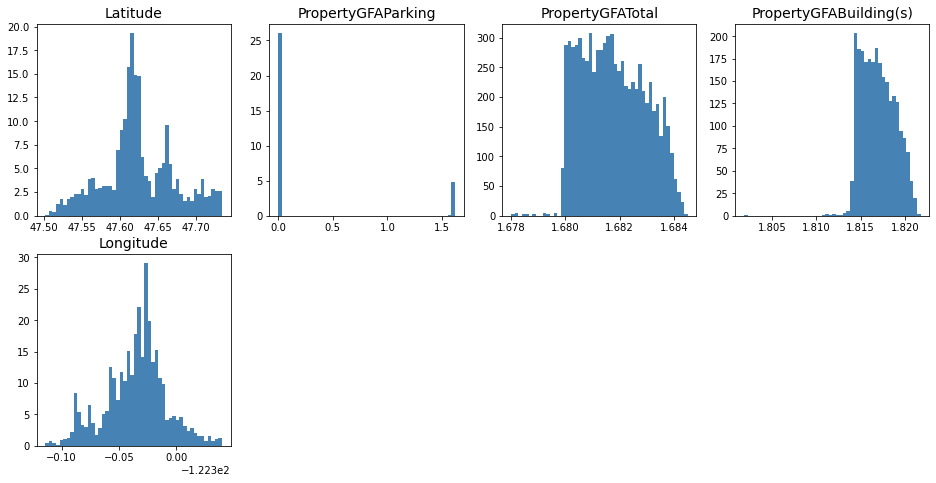

In [102]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(data.loc[:, :'Longitude'].shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

In [103]:
std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)

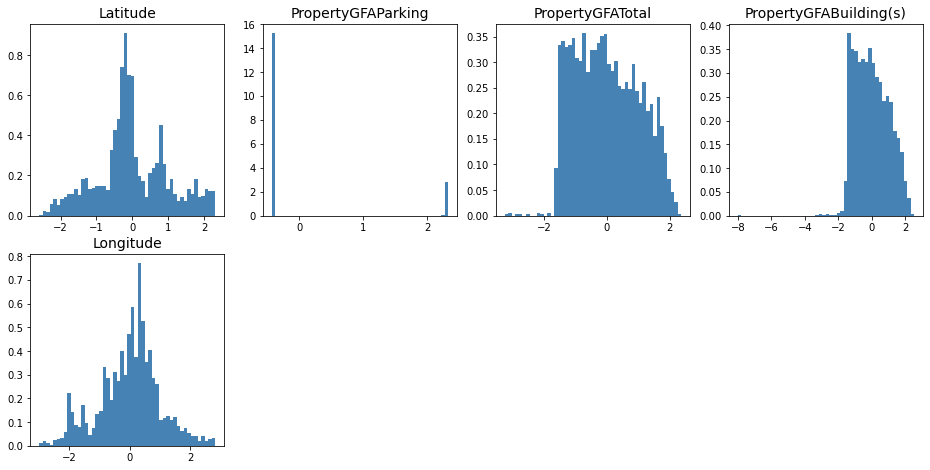

In [104]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(data.loc[:, :'Longitude'].shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

In [123]:
X_train, X_test, y_train_e, y_test_e = model_selection.train_test_split(X, y_e, test_size=0.3, random_state = 9 )

In [135]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train_e)
y_pred_rli = lr.predict(X_test)

In [138]:
Abs = "log Site Energy Use (kBtu) "
Ord = "Prédiction de log Site Energy Use (kBtu)"

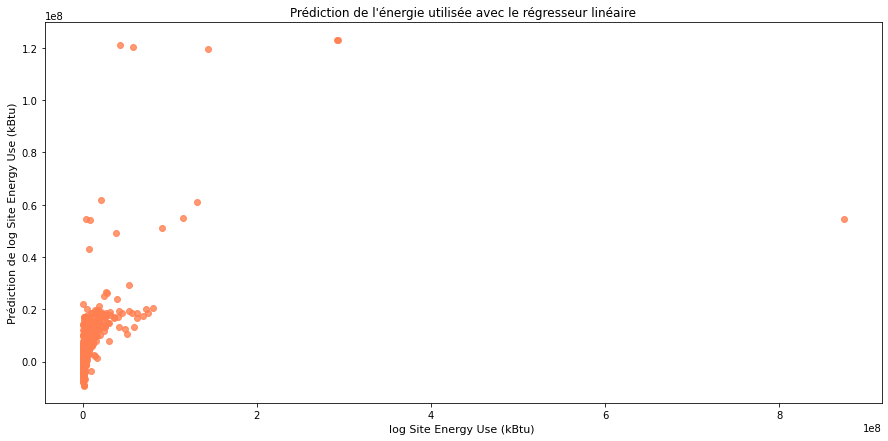

In [144]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel(Abs, fontsize = 11)
ax.set_ylabel(Ord, fontsize = 11)
plt.title("Prédiction de l'énergie utilisée avec le régresseur linéaire", fontsize = 12)
plt.scatter(y_test_e, y_pred_rli, color='coral', alpha=0.8)

In [143]:
Calcul_Erreur(y_test_e, y_pred_rli)

MAE : 5876667.6722
R-squared : 0.2345
MSE : 820777300863592.2500
RMSE : 28649211.1735
